In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pywaffle import Waffle 
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
from matplotlib import pyplot
from attention import AttentionLayer
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")


In [66]:
df = pd.read_csv("c19_myths.csv")

In [67]:
df

,index,summary,label,topic_info,aid,animals,conspiracies,detection,food,governments,...,origins,other diseases,predictions,religion,risk factors,spread,symptoms,travel,vaccines,text
0,CA0,Basic protective measures against the new coronavirus,true,multiple topic,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"Stay aware of the latest information on the COVID-19 outbreak, available on the WHO website and through your national and local public health authority. Most people who become infected experience ..."
1,CA1,Exposing yourself to the sun or to temperatures higher than 25C degrees DOES NOT prevent the coronavirus disease (COVID-19),true,multiple topic,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"You can catch COVID-19, no matter how sunny or hot the weather is. Countries with hot weather have reported cases of COVID-19. To protect yourself, make sure you clean your hands frequently and th..."
2,CA10,How effective are thermal scanners in detecting people infected with the new coronavirus,true,multiple topic,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,"Thermal scanners are effective in detecting people who have developed a fever (i.e. have a higher than normal body temperature) because of infection with the new coronavirus. However, they cannot ..."
3,CA100,Fake coronavirus vaccines and repurposed drugs are being sold on the dark web,true,multiple topic,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"Australian researchers have found a smorgasbord of COVID-19-related medicines such as the much hyped anti-malarial drug hydroxychloroquine, for sale on the dark web.The shadowy ""dark web"" online n..."
4,CA1001,Books predicted the coronavirus before it happened.,misleading,single topic,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"Users are sharing images from the books, one of them written in 1981, on Facebook, WhatsApp And Twitter highlighting excerpts from the books that speak about a similar outbreak., While the interne..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,CA993,A post on LEGITFUND.COM claimed that Nigerian Vice-President Mr Abubakar was weeping at the loss of his son's life.,false,single topic,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"A post on LEGITFUND.COM claimed that Mr Abubakar was weeping at the loss of his son’s life., Mohammed Atiku is not DEAD. He had an unusually long recovery period of about 40 days from treatment. H..."
2522,CA994,Homemade masks prevent the spread of coronavirus.,false,multiple topic,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,"""The posts\xa0caption reads: “Situation in Italy”."", The novel coronavirus, which causes the disease COVID-19, was first detected in the Chinese city of Wuhan in late 2019. As of April 1, 2020, CO..."
2523,CA996,Multiple Facebook and Twitter posts shared hundreds of times claim the antiviral medicine remdesivir has been approved by the US Food and Drug Administration (FDA) as a treatment for the novel cor...,misleading,multiple topic,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,"The three-minute 20-second video included in the post appears to be taken from a news segment about the use of the antiviral remdesivir against COVID-19., The caption, written in a mix of English ..."
2524,CA997,Russia unleashed more than 500 lions on its streets to ensure that people are staying indoors during this pandemic outbreak.,false,multiple topic,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,"More Info, Russian President Vladimir Putin hasn’t resorted to releasing lions in order to keep people inside during the COVID-19 pandemic., Well, that’s one way to do it., Posts online claim that..."


In [3]:
topics = list(df.columns[4:-1])

In [4]:
df2 = df[df.columns[4:-1]]

In [5]:
sumlist = []
for i in range(len(topics)):
    sumlist.append(df[topics[i]][df[topics[i]] == 1].count())
    

In [6]:
fulldict = {}
for key in topics: 
    for value in sumlist: 
        fulldict[key] = value 
        break  

In [7]:
fulldict = {k: v for k, v in sorted(fulldict.items(), key=lambda item: item[1])}

In [8]:
fulldict

{'aid': 171,
 'animals': 171,
 'conspiracies': 171,
 'detection': 171,
 'food': 171,
 'governments': 171,
 'hospitals': 171,
 'individuals': 171,
 'laws': 171,
 'lockdown': 171,
 'medical equipment': 171,
 'medicine': 171,
 'origins': 171,
 'other diseases': 171,
 'predictions': 171,
 'religion': 171,
 'risk factors': 171,
 'spread': 171,
 'symptoms': 171,
 'travel': 171,
 'vaccines': 171}

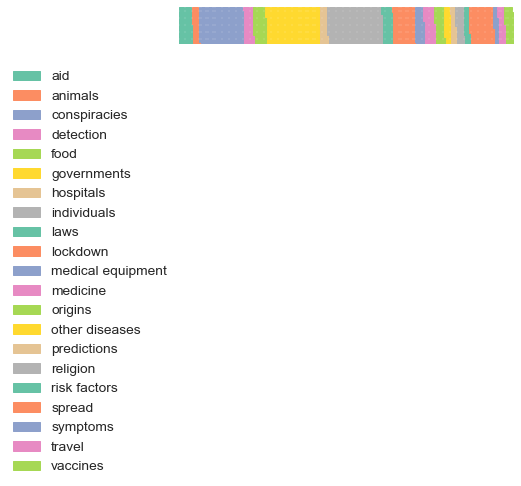

In [79]:
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = len(topics), 
    values = sumlist, 
    labels = topics,
    legend = {'framealpha': 0,
             'bbox_to_anchor': (0, -0.4)}
) 


In [10]:
lol = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
for k in range (21):
    for i in range(len(df2[df2[topics[k]] == 1])):
        for j in range(21):
            if df2[df2[topics[k]] == 1].iloc[i,j] == 1:
                lol[k].append(topics[j])

In [11]:
result = pd.DataFrame(Counter(lol[0]).values(), Counter(lol[0]).keys())

In [12]:
for i in range(1, 21):
    temp = pd.DataFrame(Counter(lol[i]).values(), Counter(lol[i]).keys())
    result = pd.concat([result, temp], axis=1, sort=True)
result.columns = [topics] 
result = result.fillna(0)
result = result.astype(int)

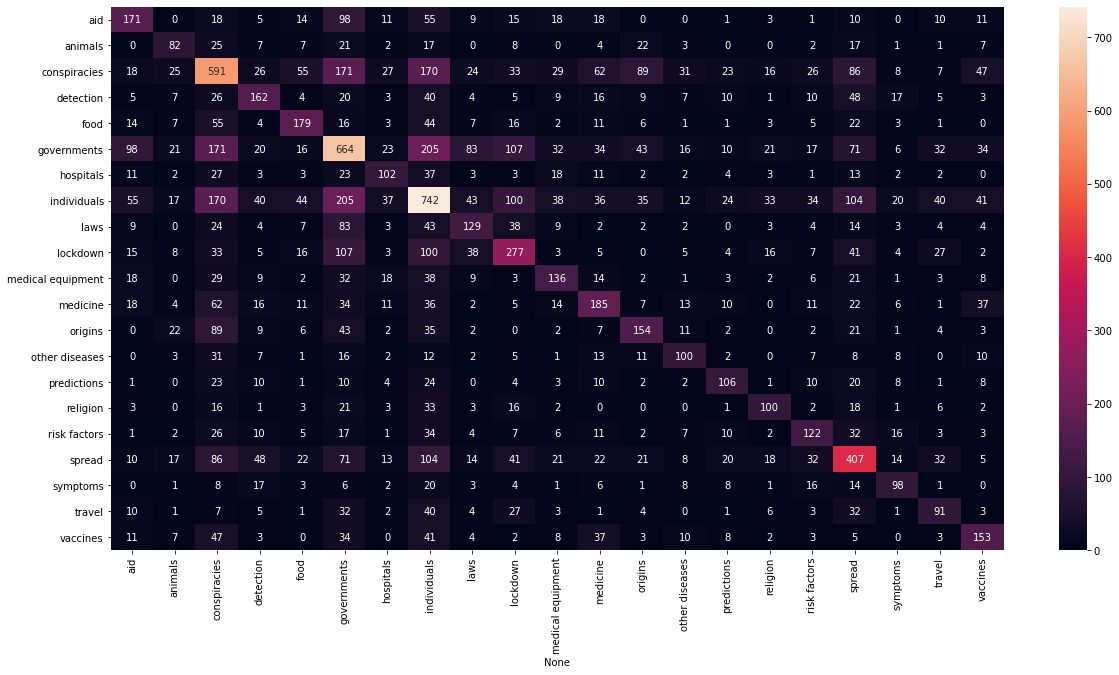

In [13]:
plt.figure(figsize = (20,10))
ax = sns.heatmap(result, annot = True, fmt = 'd')

In [14]:
df_true = df[df['label'] == 'true']
df_false = df[df['label'] != 'true']

In [15]:
sumlist = []
for i in range(len(topics)):
    sumlist.append(df_true[topics[i]][df_true[topics[i]] == 1].count())


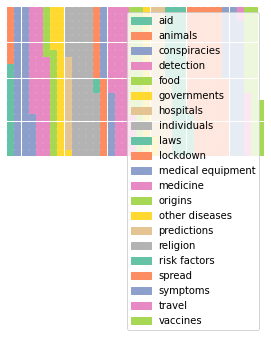

In [16]:
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = len(topics), 
    values = sumlist, 
    labels = topics 
) 

In [17]:
sumlist = []
for i in range(len(topics)):
    sumlist.append(df_false[topics[i]][df_false[topics[i]] == 1].count())


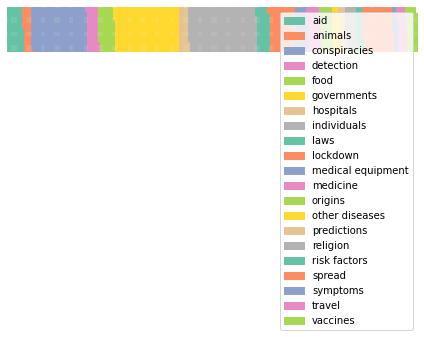

In [18]:
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = len(topics), 
    values = sumlist, 
    labels = topics 
) 

In [19]:
lol = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
for k in range (21):
    for i in range(len(df_true[df_true[topics[k]] == 1])):
        for j in range(21):
            if df_true[df_true[topics[k]] == 1].iloc[i,j] == 1:
                lol[k].append(topics[j])

In [20]:
result = pd.DataFrame(Counter(lol[0]).values(), Counter(lol[0]).keys())

In [21]:
for i in range(1, 21):
    temp = pd.DataFrame(Counter(lol[i]).values(), Counter(lol[i]).keys())
    result = pd.concat([result, temp], axis=1, sort=True)
result.columns = ['aid',
 'animals',
 'conspiracies',
 'detection',
 'food',
 'governments',
 'hospitals',
 'individuals',
 'laws',
 'lockdown',
 'medical equipment',
 'medicine',
 'origins',
 'other diseases',
 'predictions',
 'risk factors',
 'spread',
 'symptoms',
 'travel',
 'vaccines'] 
result = result.fillna(0)
result = result.astype(int)

In [22]:
result

,aid,animals,conspiracies,detection,food,governments,hospitals,individuals,laws,lockdown,medical equipment,medicine,origins,other diseases,predictions,risk factors,spread,symptoms,travel,vaccines
food,13,0,0,1,1,5,2,4,0,1,5,2,0,0,1,0,0,0,1,2
governments,0,8,1,3,0,3,0,0,0,0,0,2,4,0,0,1,2,0,0,1
hospitals,0,1,48,3,1,4,0,4,0,0,0,7,11,3,5,3,7,0,0,4
individuals,1,3,3,50,0,0,2,11,0,1,2,10,2,3,6,10,13,9,0,1
laws,1,0,1,0,22,0,0,4,0,2,1,2,0,0,0,1,5,0,0,0
lockdown,5,3,4,0,0,28,1,3,1,2,2,2,4,0,0,0,2,0,1,4
medical equipment,2,0,0,2,0,1,13,2,0,0,4,2,0,0,1,0,0,1,0,0
medicine,4,0,4,11,4,3,2,79,1,7,2,10,2,1,6,16,14,6,0,6
origins,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0
other diseases,1,0,0,1,2,2,0,7,0,21,1,3,0,1,1,3,3,2,0,0


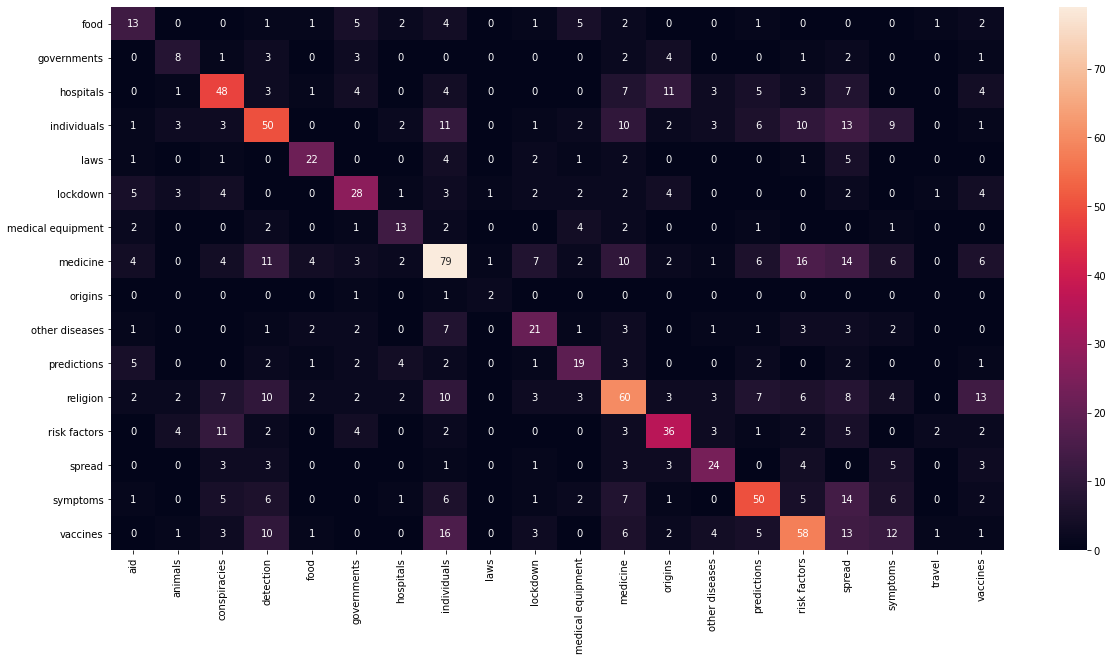

In [23]:
plt.figure(figsize = (20,10))
ax = sns.heatmap(result, annot = True, fmt = 'd')

In [24]:
lol = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
for k in range (21):
    for i in range(len(df_false[df_false[topics[k]] == 1])):
        for j in range(21):
            if df_false[df_false[topics[k]] == 1].iloc[i,j] == 1:
                lol[k].append(topics[j])

In [25]:
result = pd.DataFrame(Counter(lol[0]).values(), Counter(lol[0]).keys())

In [26]:
for i in range(1, 21):
    temp = pd.DataFrame(Counter(lol[i]).values(), Counter(lol[i]).keys())
    result = pd.concat([result, temp], axis=1, sort=True)
result.columns = [topics] 
result = result.fillna(0)
result = result.astype(int)

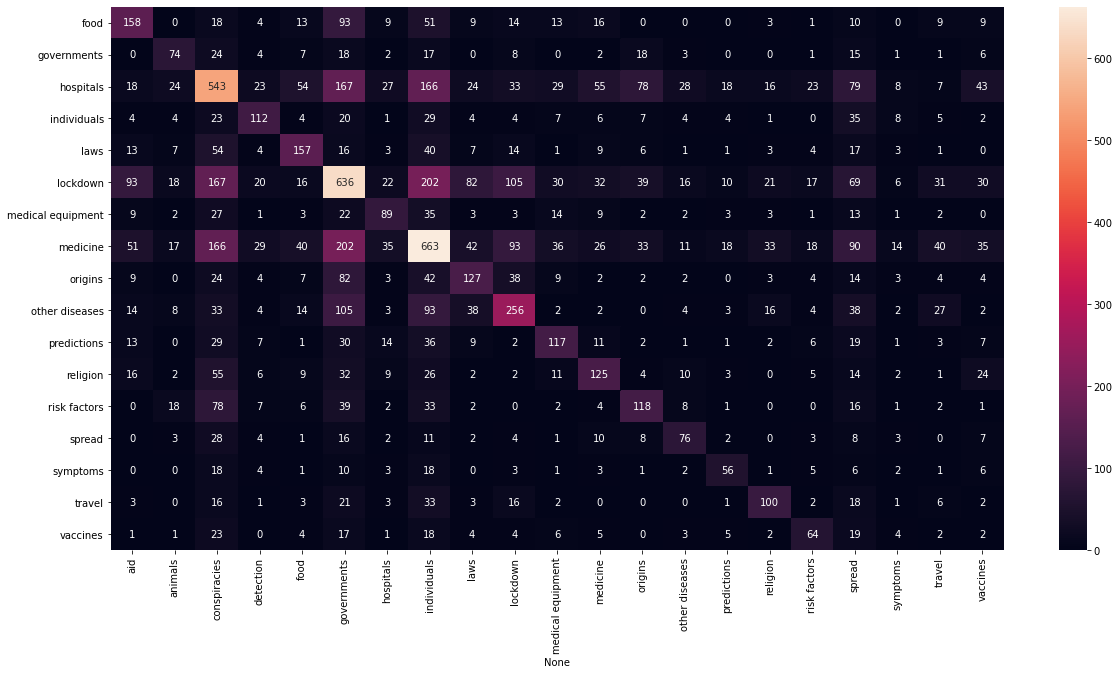

In [27]:
plt.figure(figsize = (20,10))
ax = sns.heatmap(result, annot = True, fmt = 'd')

# Part 2

In [28]:
p2_df = df[['individuals', 'governments', 'conspiracies', 'spread', 'lockdown', 'summary']]

In [30]:
p2_df['summary'] = p2_df['summary'].map(lambda x:re.sub('[,\.!?]', '', x))
p2_df['summary'] = p2_df['summary'].map(lambda x: x.lower())

In [32]:
long_string = ','.join(list(p2_df['summary'].values))

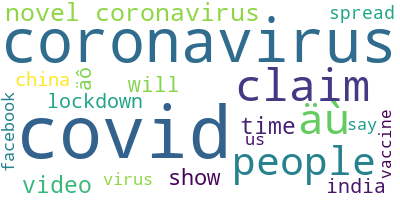

In [33]:
wordcloud = WordCloud(background_color="white", max_words=20,contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [34]:
sns.set_style('whitegrid')
%matplotlib inline
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

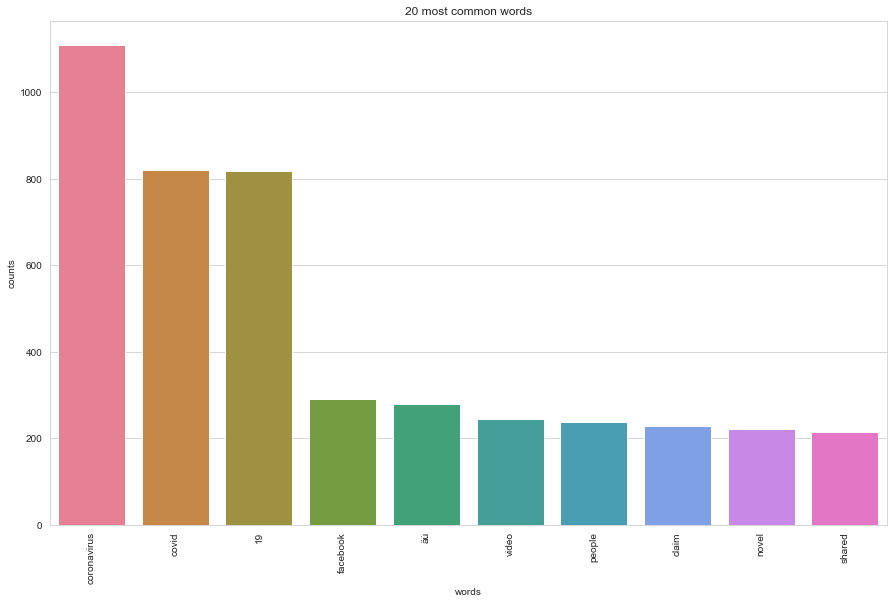

In [35]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data =count_vectorizer.fit_transform(p2_df['summary'])
plot_10_most_common_words(count_data, count_vectorizer)

# Part 3

In [36]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [37]:
p3_df = df[['summary', 'text']]

In [39]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []

for t in p3_df['text']:
    cleaned_text.append(text_cleaner(t))

In [40]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in p3_df['summary']:
    cleaned_summary.append(summary_cleaner(t))

p3_df['cleaned_text']=cleaned_text
p3_df['cleaned_summary']=cleaned_summary
p3_df['cleaned_summary'].replace('', np.nan, inplace=True)
p3_df.dropna(axis=0,inplace=True)

In [41]:
p3_df['cleaned_summary'] = p3_df['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [42]:
for i in range(5):
    print("Text:",p3_df['cleaned_text'][i])
    print("Summary:",p3_df['cleaned_summary'][i])
    print("\n")

Text: stay aware latest information covid outbreak available website national local public health authority people become infected experience mild illness recover severe others take care health protect others following wash hands frequently regularly thoroughly clean hands alcohol based hand rub wash soap water washing hands soap water using alcohol based hand rub kills viruses may hands maintain social distancing maintain least metre distance anyone coughing sneezing someone coughs sneezes spray small liquid droplets nose mouth may contain virus close breathe droplets including covid virus person coughing disease avoid touching eyes nose mouth hands touch many surfaces pick viruses contaminated hands transfer virus eyes nose mouth virus enter body make sick practice respiratory hygiene make sure people around follow good respiratory hygiene means covering mouth nose bent elbow tissue cough sneeze dispose used tissue immediately droplets spread virus following good respiratory hygiene 

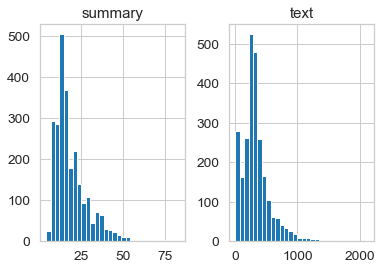

In [43]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in p3_df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in p3_df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [44]:
max_len_text=400
max_len_summary=25

In [45]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(p3_df['cleaned_text'],p3_df['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True)

In [46]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [47]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [48]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 400, 500)     15289500    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 400, 500), ( 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [49]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [50]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [51]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size= 512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))



Epoch 1/50
5/5 [==============================] - 2583s 517s/step - loss: 7.2283 - val_loss: 4.3741
Epoch 2/50
5/5 [==============================] - 2005s 401s/step - loss: 4.6748 - val_loss: 4.1886
Epoch 3/50
5/5 [==============================] - 2499s 500s/step - loss: 4.3797 - val_loss: 4.0419
Epoch 4/50
5/5 [==============================] - 2024s 405s/step - loss: 4.2616 - val_loss: 3.9900
Epoch 5/50
5/5 [==============================] - 1889s 378s/step - loss: 4.1875 - val_loss: 3.9711
Epoch 6/50
5/5 [==============================] - 1876s 375s/step - loss: 4.1907 - val_loss: 3.9126
Epoch 7/50
5/5 [==============================] - 2051s 410s/step - loss: 4.0838 - val_loss: 3.9567
Epoch 00007: early stopping


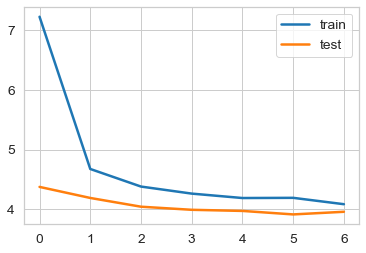

In [53]:
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [54]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [55]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [59]:
import time
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    start_time = time.time()
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end' and sampled_token !='the' and sampled_token != 'coronavirus'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c
        elapsed_time = time.time()-start_time
        if elapsed_time >= 15:
            stop_condition=True

    return decoded_sentence

In [62]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
          if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
          if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [64]:
for i in range(len(x_val)):
    print("Review:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
    print("\n")

Review: official address nation april president kenyatta directed ministry sports culture heritage avail ksh million national sports arts social development fund used artists actors musicians period country battling coronavirus outbreak february music copyright society kenya announced distribution ksh million royalties organization collected period july december chairman announced percent royalties would distributed best representative list works performed percent would distributed generally registered members president also mentioned billion paid artists raised royalties taxpayers money post claims pleased announce ministry ict innovation youth affairs collaboration kenya copyright board collective management organizations established framework ensure full transparency artists earnings administration projected total every month paid musicians system platforms translates ksh billion going pockets kenyan artists said president kenyatta april figure ksh billion first announced president 

KeyError: 0